# 1. Import the required libraries

In [1]:
# Standard code libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Custom code libraries from ReSurfEMG
from resurfemg.helper_functions.config import Config
from resurfemg.data_connector import file_discovery
from resurfemg.pipelines import ipy_widgets
from resurfemg.data_connector.tmsisdk_lite import Poly5Reader
from resurfemg.pipelines.pipelines import quick_look

config = Config()

%matplotlib widget

## 2. Load sEMG test data

## Synthetic data

In [2]:
# For the test data:
base_path = config.get_directory('test_data')

files = file_discovery.find_files(
    base_path=base_path,
    file_name_regex='*',
    extension_regex='Poly5',
    folder_levels=None,
    verbose=False
)
button_list = ipy_widgets.file_select(
    files=files,
    folder_levels=['files'],
    default_value_select=None,
    default_idx_select=[0])

interactive(children=(Dropdown(description='files:', options=('emg_data_synth_pocc.Poly5', 'emg_data_synth_qui…

In [3]:
# Load the EMG from the selected folders (synthetic data):
emg_file_chosen = os.path.join(base_path, *[btn.value for btn in button_list])

data_emg = Poly5Reader(emg_file_chosen)
data_emg_samples = data_emg.samples[:data_emg.num_samples]
fs_emg = data_emg.sample_rate

y_emg = data_emg_samples
t_emg = [i/fs_emg for i in range(len(y_emg[0, :]))]

Reading file  C:/Users/warnaarrsp/repos/ReSurfEMG_ReSurfEMG/test_data\emg_data_synth_pocc.Poly5
	 Number of samples:  860160 
	 Number of channels:  2 
	 Sample rate: 2048 Hz
Done reading data.


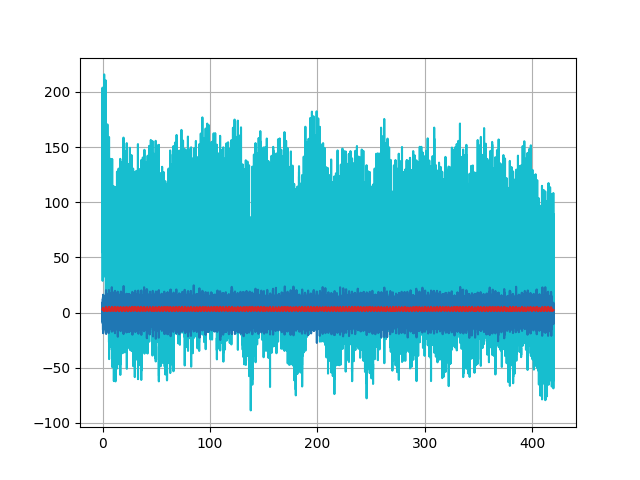

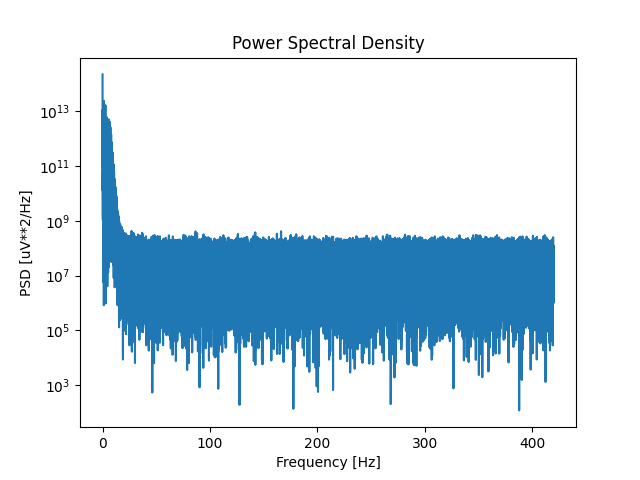

In [4]:
_ = quick_look(y_emg[1, :], fs_emg=fs_emg, plot_raw=True)